## Первичный анализ данных с использованием описательных статистик и визуализации
### Kirill Zakharov

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Для выполнения задания был выбран датасет с данными о вине (красном и белом). В таблице представлены данные по кислотности, уровню сахара, алкоголя и т.д.

In [3]:
filename = 'wine.csv'
data = pd.read_csv(filename)
data.head(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [109]:
data.shape

(6497, 13)

Всего иммеется 6497 строк (количество наблюдаемого вина) и 13 характеристик этого вина.

In [110]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Как видно данные представлены преимущественно в вещественном формате, что значительно облегчает дальнейший анализ.

In [111]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


По разному количеству строк видно, что есть пропуски в таблице. Выборочное среднее у всех характеристик имеет адекватное представление. Также можно увидеть, что в данном датасете есть вино получившее оценку 9 и есть вино с наименьшей оценкой 3.

Для удобства дальнейшего анализа данных дополним наши данные, заменив пропуски в соответсвующих столбцах на среднее в этом столбце.

In [4]:
data['fixed acidity'] = data['fixed acidity'].fillna(7.216579)
data['volatile acidity'] = data['volatile acidity'].fillna(0.339691)
data['citric acid'] = data['citric acid'].fillna(0.318722)
data['residual sugar'] = data['residual sugar'].fillna(5.444326)
data['chlorides'] = data['chlorides'].fillna(0.056042)
data['pH'] = data['pH'].fillna(3.218395)
data['sulphates'] = data['sulphates'].fillna(0.531215)
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [37]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


Высокую корреляцию имеют признаки остаточный сахар и плотность вина, а также общий диоксид серы со свободным диоксидом серы. Качество сильнее всего зависит от плотности вина, причем отрицательно.

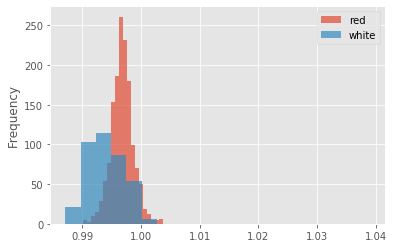

In [114]:
data.groupby('type')['density'].plot.hist(alpha=0.7, density=True, bins=20)
plt.legend()
plt.show()

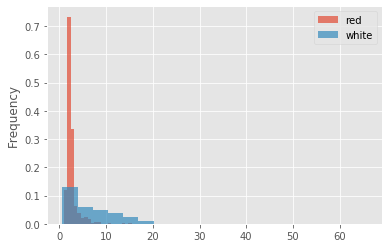

In [115]:
data.groupby('type')['residual sugar'].plot.hist(alpha=0.7, density=True, bins=20)
plt.legend()
plt.show()

После группировки по признаку плотность видно, что у красного вина плотность выше и меньше разброс. Также разброс по остаточному сахару в красном вине меньше чем в белом.

## Гистограммы

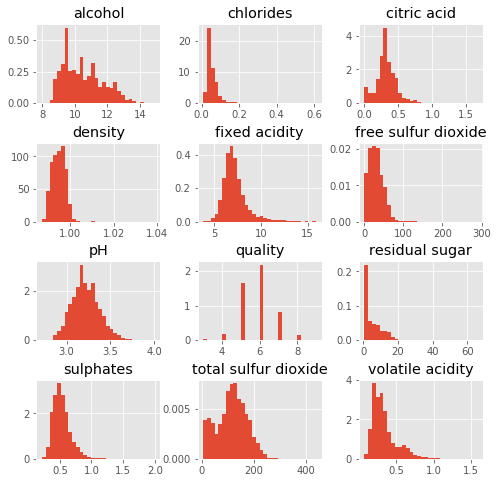

In [116]:
data.hist(figsize=(8,8), density=True, layout=(4,3), bins=30, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

В уровнях кислотности преобладает нормальное распределение, а вот для сульфатов больше подходит логнормальное распределение. Довольно не понятно распределение уровня алкоголя, поэтому продолжим анализ.

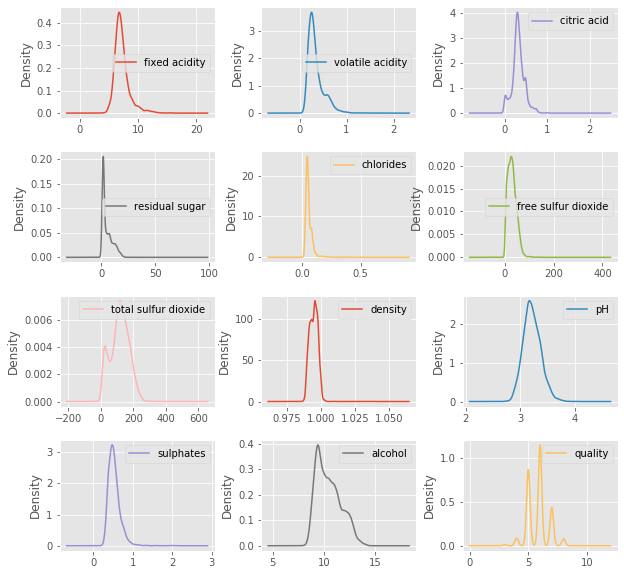

In [117]:
data.plot(kind='kde',subplots=True, figsize=(10,10), layout=(4,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

После построения ядерных оценок плотности можно сказать, что распределение уровня алкоголя близко к логнормальному, из-за резкого подьема в начале.

## Ящик с усами

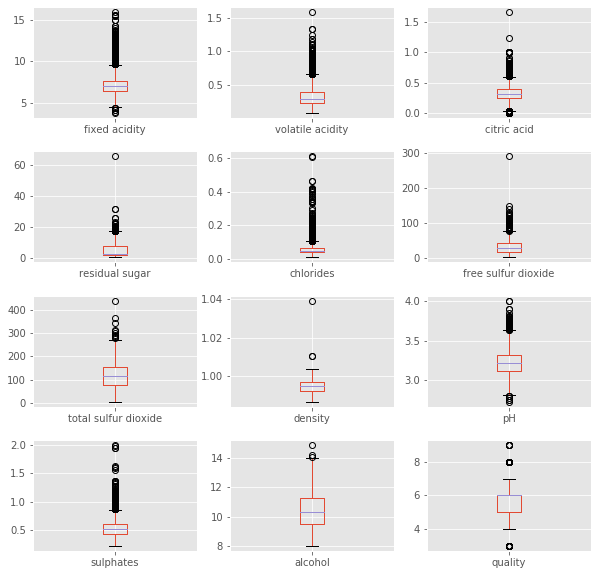

In [118]:
data.plot(kind='box',subplots=True, figsize=(10,10), layout=(4,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

После построения ящика с усами видно большое количетсво выбросов в измерениях кислот и сульфатов.

## Многомерные графики распределений

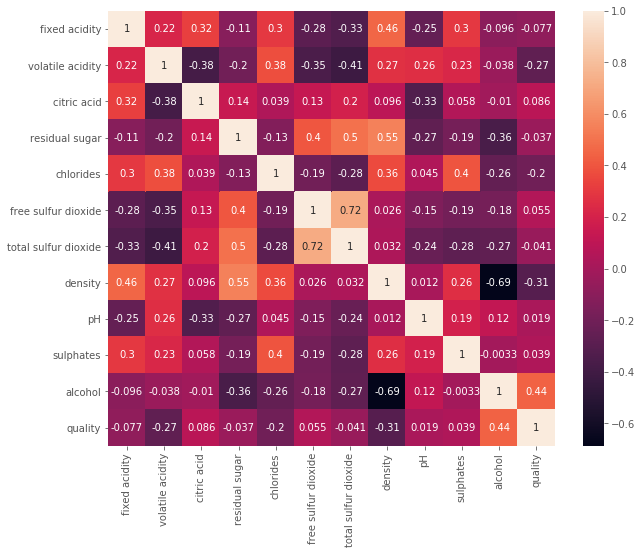

In [24]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

b1,t1=plt.ylim()
b1+=0.5
t1-=0.5
plt.ylim(b1, t1)
plt.show()

По коррелограмме видна зависимость признаков более четко. Сильно заметна отрицательная связь уровня алкоголя и плотности вина.

In [93]:
from pandas.plotting import scatter_matrix

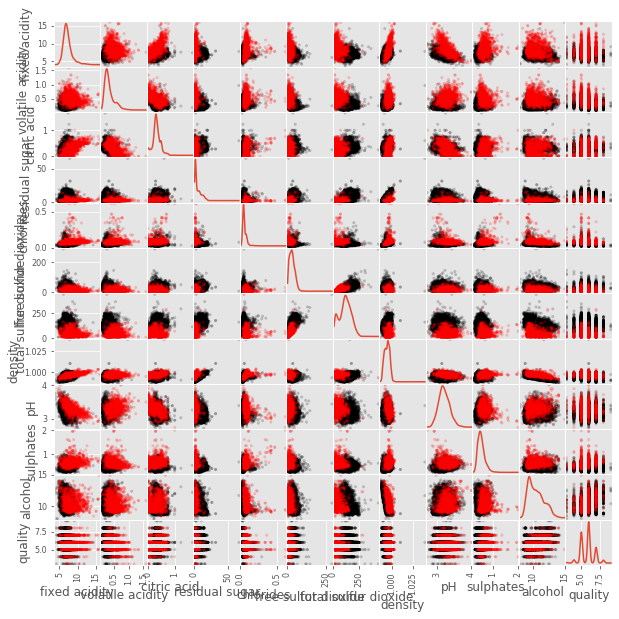

In [136]:
colors = {'white': 'black'}
scatter_matrix(data, figsize=(10,10), diagonal='kde', c=data['type'].replace(colors), alpha=0.2)

plt.show()

По диграмме рассения можно легко отследить различие признаков. Так наибольшее различие красного и белого вина достигается по признаку свободного диоксида серы.

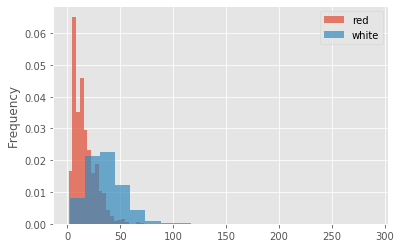

In [138]:
data.groupby('type')['free sulfur dioxide'].plot.hist(alpha=0.7, density=True, bins=20)
plt.legend()
plt.show()